# 1.0 Introduction


In this lesson, you will go through an example of a end to end Machine Learning project. Here are the main steps you will go through:
1. Look at the big picture.
2. Get the data.
3. Discover and visualize the data to gain insights.
4. Prepare the data for Machine Learning algorithms.
5. Select a model and train it.
6. Fine-tune your model.
7. Present your solution.


# 2.0 Look at the Big Picture

When you are learning about Machine Learning it is best to actually experiment with real-world data, not just artificial datasets. Fortunately, there are thousands of open datasets to choose from, ranging across all sorts of domains. You can find a wonderful material in this [github](https://github.com/awesomedata/awesome-public-datasets).


Here are a few places you can look to get data:

Popular open data repositories:
- [UC Irvine Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php)
- [Kaggle datasets](https://www.kaggle.com/datasets)
- [Amazon’s AWS datasets](https://registry.opendata.aws/)

In this lesson we chose the California Housing Prices dataset from the StatLib repository. This dataset was based on data from the 1990 California census. It is not exactly recent (you could still afford a nice house in the Bay Area at the time), but it has many qualities for learning, so we will pretend it is recent data. We also added a categorical attribute and removed a few features for teaching purposes.

<center>
<img width="400" src="https://drive.google.com/uc?export=view&id=1IWpeT-KsoGgfRVGKNFnABYUJWBjoKnYs">
 </center>
  
The first task you are asked to **perform is to build a model of housing prices in California using the California census data**. This data has metrics such as the
population, median income, median housing price, and so on for each block group in California. Block groups are the smallest geographical unit for which the US Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). We will just call them **“districts”** for short.
Your model should learn from this data and be able to predict the median housing price in any district,
given all the other metrics.


**Reference**

Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions, Statistics and Probability Letters, 33 (1997) 291-297.



## 2.1 Frame the problem

The first question to ask your "boss" is what exactly is the business objective 
- **building a model is probably not the end goal**
- how does the company expect to use and benefit from this model? 

This is important because it will determine how you frame the problem.
- what algorithms you will select,
- what performance measure you will use to evaluate your model


Okay, with all this information you are now ready to start designing your system. First, you need to frame the problem: 

- is it supervised, unsupervised, or reinforcement learning?
- is it a classification task, a regression task, or something else? 
- should you use batch learning or online learning techniques? 

Before you read on, pause and try to answer these questions for yourself.

**Let’s see:** it is clearly a **typical supervised learning task** since you are given
labeled training examples (each instance comes with the expected output, i.e., the district’s median housing price). Moreover, it is also a **typical regression task**, since you are asked to predict a value. More specifically, this is a multivariate regression problem since the system will use multiple features to make a prediction (it will use the district’s population, the median income, etc.).


## 2.2 Select a Performance Measure

Your next step is to select a performance measure. A typical performance measure for regression problems is the **Root Mean Square Error (RMSE)**. It measures the standard deviation of the errors the system makes in its predictions.

$$
RMSE(X,h) = \displaystyle \sqrt{\frac{1}{m}\sum_{i=1}^{m}(h(x^{(i)}) - y ^{(i)})^2}
$$

This equation introduces several very common Machine Learning notations that we will use throughout this course:
- $m$ is the number of instances in the dataset you are measuring the RMSE on.
  - For example, if you are evaluating the RMSE on a validation set of 2,000 districts, then m = 2,000.
- $x^{(i)}$ is a vector of all the feature values (excluding the label) of the ith instance in the dataset, and $y^{(i)}$ is its label (the desired output
value for that instance).
  - For example, if the first district in the dataset is located at longitude –118.29°, latitude 33.91°, and it has 1,416 inhabitants with a median income of \$ 38,372, and the median house value is $156,400 (ignoring the other features for now), then:
  
$$
x^{(1)} = \begin{bmatrix}
    -118.29 \\
    33.91\\
    1.416 \\
    38.372
\end{bmatrix} \hspace{1.5cm} y^{(1)} = 156.400
$$

- X is a matrix containing all the feature values (excluding labels) of all instances in the dataset. There is one row per instance and the $i^{th}$ row is equal to the transpose of $x^{(i)}$, noted $(x^{(i)})^T$.

$$
X = \begin{bmatrix}
    (x^{(1)})^T\\
    (x^{(2)})^T\\
    \vdots \\
    (x^{(1999)})^T\\
    (x^{(2000)})^T
\end{bmatrix} = 
\begin{bmatrix}
    -118.29 & 33.91 & 1.416 & 38.372\\
    \vdots & \vdots & \vdots & \vdots\\
\end{bmatrix}
$$
- $h$ is your system’s prediction function, also called a $hypothesis$. When your system is given an instance’s feature vector $x^{(i)}$, it outputs a predicted value $\hat{y}^{(i)} = h(x^{(i)})$ for that instance ($\hat{y}$ is pronounced “y-hat”).
  - For example, if your system predicts that the median housing price in the first district is \$158,400, then $\hat{y}^{(1)} = h(x^{(1)}) = 158,400$.
The prediction error for this district is $\hat{y}^{(1)} – y^{(1)} = 2,000$.

# 3.0 Get Data

It's time to get your hands dirty. In typical environments your data would be available in a relational database (or some other common datastore) and spread across multiple tables/documents/files. To access it, you would first need to get
your credentials and access authorizations, and familiarize yourself with the data schema.

In this project, however, things are much simpler: you will just download a single compressed file, [**housing.tgz**](https://github.com/ageron/handson-ml/blob/master/datasets/housing/housing.csv), which contains a comma-separated value (CSV) file called housing.csv with all the data.



## 3.1 Uploading files from your local file system

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving future_encoders.py to future_encoders.py
Saving housing.csv to housing.csv
User uploaded file "future_encoders.py" with length 32406 bytes
User uploaded file "housing.csv" with length 1423529 bytes


## 3.2 Take a quick look at the data structure

In [3]:
import pandas as pd

# read the dataset to a Pandas' dataframe
data = pd.read_csv("housing.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Each row represents one district. There are 10 attributes:
- **longitude**: computed distances among the centroids of each district as measured in longitude.
- **latitude**: computed distances among the centroids of each district as measured in latitude.
- **housing_median_age**: median age of district housing at location
- **total_rooms**: total rooms in the district
- **total_bedrooms**: total bedrooms in the district
- **population**: total population in the district
- **households**: total households in the district
- **median_income**: median income of households in the district
- **median_house_value**: median value of housing in the district
- **ocean_proximity**: distance to the ocean

The info() method is useful to get a quick description of the data, in particular the total number of rows, and each attribute’s type and number of non-null values

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


- There are 20,640 instances in the dataset
- It is fairly small by Machine Learning standards, but it’s perfect to get started. 
- Notice that the **total_bedrooms** attribute has only 20,433 nonnull
values, meaning that 207 districts are missing this feature. We will need to take care of this later.
-  All attributes are numerical, except the **ocean_proximity** field. Its type is *object*, so it could hold any kind of Python object, but since you loaded this data from a CSV file you know that it must be a text attribute. When you looked at the top five rows, you probably noticed that the values in that column were
repetitive, which means that it is probably a categorical attribute.

In [5]:
# You can find out what categories exist and 
# how many districts belong to each category
# by using the value_counts()

data.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
# The describe() method shows a summary of the numerical attributes
# Note that non numerical features were not shown
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


- The **count, mean, min, and max** rows are self-explanatory. 
- Note that the null values are ignored (so, for example, count of total_bedrooms is 20,433, not 20,640). 
- The **std** row shows the standard deviation (which measures how dispersed the values are). 
- The **25%, 50%, and 75%** rows show the corresponding percentiles: a percentile indicates the value below which a given percentage of observations in a group
of observations falls. For example, 25% of the districts have a **housing_median_age** lower than 18, while 50% are lower than 29 and 75% are lower than 37. These are often called the 25th percentile (or 1st quartile), the median,   and the 75th percentile (or 3rd quartile).

### 3.2.1 Histogram

Another quick way to get a feel of the type of data you are dealing with is **to plot a histogram** for each numerical attribute. A histogram shows the number of instances (on the vertical axis) that have a given value range (on the horizontal axis). You can either plot this one attribute at a time, or you can call the *hist()* method on the whole dataset, and it will plot a histogram for each numerical attribute.


For example, you can see that slightly over 800 districts have a **median_house_value** equal to about $500,000.

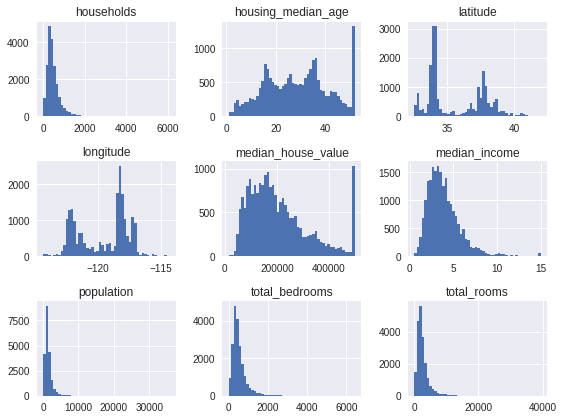

In [7]:
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(8,6))
plt.tight_layout()
plt.show()

In [0]:
# Cell Configuration for plotly over google colab
# This method pre-populates the outputframe with the configuration that Plotly
# expects and must be executed for every cell which is displaying a Plotly graph.
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

In [9]:
import numpy as np
import pandas as pd
# plotly online requires login and password
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

# basic functions to run on google colab
configure_plotly_browser_state()
init_notebook_mode(connected=False)

# create a generic layout
layout = go.Layout(width=1000,height=400)

# generate a histogram from column median_house_value 
trace = [go.Histogram(x=data["median_house_value"], nbinsx=50)]

# create a figure and plot in notebook. 
# if you wish save the hmtl, change iplot to plot
fig = go.Figure(data=trace,layout=layout)
pyo.iplot(fig)

Notice a few things in these histograms:

1. The **median income** attribute does not look like it is expressed in US dollars (USD). [After checking with the team](https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html) that collected the data, you are told that the data has been scaled and capped at 15 (actually 15.0001) for higher median incomes, and at 0.5 (actually 0.4999) for lower median incomes. **Working with preprocessed attributes is common in Machine Learning**, and it is not necessarily a problem, but you should try to understand how the data was computed.
2. The **housing median age** and the **median house value** were also capped. The latter may be a serious problem since it is your target attribute (your labels). 
3. These attributes have very **different scales**. We will discuss this later when we explore **feature scaling**.
4. Finally, **many histograms are tail heavy**: they extend much farther to the right of the median than to the left. This may make it a bit harder for some Machine Learning algorithms to detect patterns. We will try **transforming these attributes later on to have more bell-shaped distributions**.

### 3.2.2 Create a Test Set

Creating a test set is theoretically quite simple: just pick some instances randomly, typically 20% of the
dataset, and set them aside:



In [0]:
import numpy as np

# data - dataset
# test_ratio - percentage used to the test set
def split_train_test(data, test_ratio):
  
  #scramble the position
  shuffled_indices = np.random.permutation(len(data))
  #find the test set size
  test_set_size = int(len(data) * test_ratio)
  #split the indices
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  
  return data.iloc[train_indices], data.iloc[test_indices]

You can then use this function like this:


In [11]:
train_set, test_set = split_train_test(data, 0.2)
print("data has {} atributes, that is the same of {}\
train instances + {} test intances ({})".
      format(len(data),len(train_set),len(test_set),len(train_set)+len(test_set)))


data has 20640 atributes, that is the same of 16512train instances + 4128 test intances (20640)


Well, this works, but it is not perfect: if you run the program again, it will generate a different test set! Over time, you (or your Machine Learning algorithms) will get to see the whole dataset, **which is what you want to avoid.**

[Scikit-Learn](http://scikit-learn.org/stable/) provides a few functions to split datasets into multiple subsets in various ways. The simplest function is [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) , which does pretty much the same thing as the function *split_train_test* defined earlier, with a couple of additional features. 

- First there is a **random_state** parameter that allows you to set the random generator seed
- And second you can pass it multiple datasets with an identical number of rows, and it will split them on the same indices (this is very useful, for example, if you have a separate DataFrame for labels)

In [12]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, 
                                       test_size=0.2, 
                                       random_state=35)

print("data has {} instances\n {} train instances\n {} test intances".
      format(len(data),len(train_set),len(test_set)))


data has 20640 instances
 16512 train instances
 4128 test intances


# 4.0 Discover and Visualize the Data to Gain Insights

So far you have only taken a quick glance at the data to get a general understanding of the kind of data you are manipulating. Now the goal is to go a little bit more in depth.

- First, make sure you have put the test set aside and **you are only exploring the training set**. 
- Also, if the training set is very large, you may want to sample an exploration set, to make manipulations easy and fast. **In our case, the set is quite small** so you can just work directly on the full set. 
- Let’s **create a copy** so you can play with it without harming the training set


In [0]:
train = train_set.copy()

## 4.1 Visualizing Geographical Data

Since there is geographical information (latitude and longitude), it is a good idea to create a scatterplot of all districts to visualize the data.

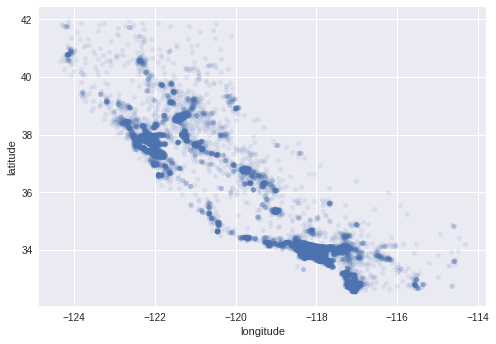

In [14]:
train.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

In [15]:
# plotly online requires login and password
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

# basic functions to run on google colab
configure_plotly_browser_state()
init_notebook_mode(connected=False)

# create a generic layout
layout = go.Layout(width=600,height=400)

# generate a scatter from columns latitude and longitude
trace = [go.Scatter(
    x=train["longitude"], 
    y=train["latitude"],
    mode = 'markers',
    marker = dict(
      opacity = 0.1))]

# create a figure and plot in notebook. 
# if you wish save the hmtl, change iplot to plot
fig = go.Figure(data=trace,layout=layout)
pyo.iplot(fig)

You can clearly see the high-density areas, namely the Bay Area and around Los
Angeles and San Diego, plus a long line of fairly high density in the Central Valley, in particular around Sacramento and Fresno.

Now let’s look at the housing prices. The radius of each circle represents the district’s
population and the color represents the price.

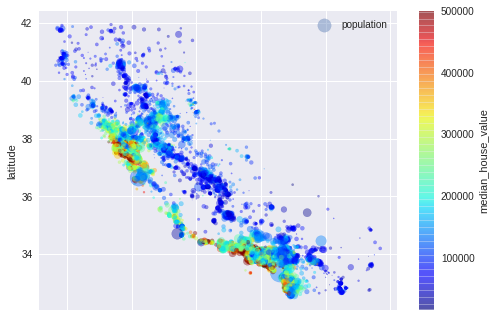

In [16]:
train.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
           s=train["population"]/100, label="population",
           c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True) 
plt.legend()

In [17]:
# plotly online requires login and password
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

# basic functions to run on google colab
configure_plotly_browser_state()
init_notebook_mode(connected=False)

# create a generic layout
layout = go.Layout(width=800,height=600)

# generate a scatter from columns latitude and longitude
trace = [go.Scatter(
    x=train["longitude"], 
    y=train["latitude"],
    mode = 'markers',
    marker = dict(
      opacity=0.3,
      size = train["population"]/500,
      color = train["median_house_value"],
      colorscale='Jet',
      showscale=True
    ))]

# create a figure and plot in notebook. 
# if you wish save the hmtl, change iplot to plot
fig = go.Figure(data=trace,layout=layout)
pyo.iplot(fig)

These images tells you that the housing prices are very much related to the location (e.g., close to the ocean) and to the population density, as you probably knew already. 

It will probably be useful to use a clustering algorithm to detect the main clusters, and add new features that measure the proximity to the cluster centers. The ocean proximity attribute may be useful as well, although in Northern California the housing prices in coastal districts are not too high, so it is not a simple rule.

## 4.2 Looking for Correlations

Since the dataset is not too large, you can easily compute the standard correlation coefficient (also called Pearson’s r) between every pair of attributes using the **corr()** method:

In [18]:
corr_matrix = train.corr()
corr_matrix["median_house_value"].\
  sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687109
total_rooms           0.132943
housing_median_age    0.106175
households            0.066714
total_bedrooms        0.051019
population           -0.026685
longitude            -0.047650
latitude             -0.142797
Name: median_house_value, dtype: float64

The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that there is a strong positive correlation; for example, the median house value tends to go up when the median income goes up. When the coefficient is close to –1, it means that there is a strong negative correlation; you can see a small negative correlation between the latitude and the median house value (i.e., prices have a slight tendency to go down when you go north). Finally, coefficients close to zero mean that there is no linear correlation.

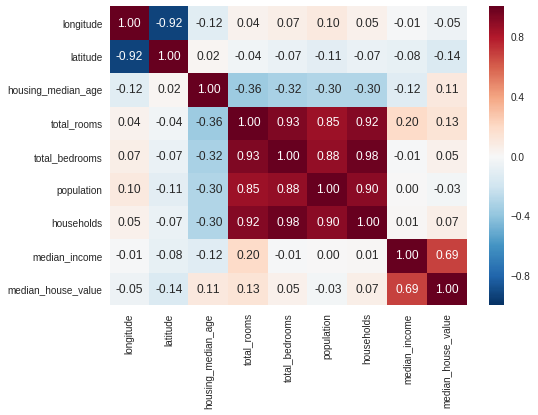

In [19]:
import seaborn as sns
sns.heatmap(train.corr(), 
            annot=True, fmt=".2f")


In [20]:
# plotly online requires login and password
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

# basic functions to run on google colab
configure_plotly_browser_state()
init_notebook_mode(connected=False)

# create a generic layout
layout = go.Layout(width=700,height=400)

# generate a scatter from columns latitude and longitude
trace = [go.Heatmap(
    x=train.corr().index, 
    y=train.corr().index,
    z=train.corr().values,
    colorscale ='Jet')]

# create a figure and plot in notebook. 
# if you wish save the hmtl, change iplot to plot
fig = go.Figure(data=trace,layout=layout)
pyo.iplot(fig)

Another way to check for correlation between attributes is to use [Seaborn’ pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) function, which plots every numerical attribute against every other numerical attribute. The main diagonal (top left to bottom right) would be full of straight lines if Seaborn plotted each variable against itself, which would not be very useful. So instead Seaborn displays a histogram of each attribute.

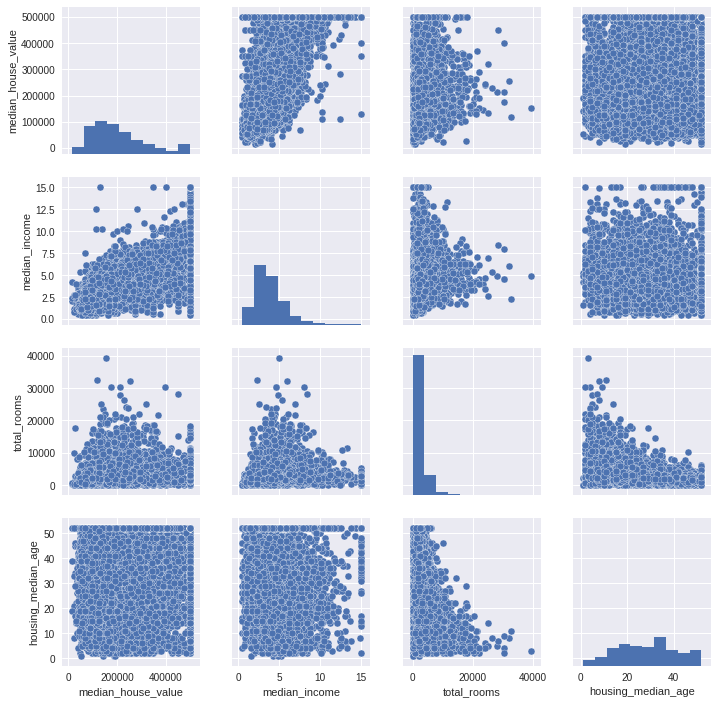

In [21]:
columns = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
sns.pairplot(train[columns], diag_kind='hist')

The most promising attribute to predict the **median house value** is the **median income**, so let’s zoom in on their correlation scatterplot.

In [22]:
# plotly online requires login and password
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

# basic functions to run on google colab
configure_plotly_browser_state()
init_notebook_mode(connected=False)

# create a generic layout
layout = go.Layout(width=600,height=400,
                  xaxis=dict(title='Median Income'),
                  yaxis=dict(title='Median House Value')) 

# generate a scatter from columns latitude and longitude
trace = [go.Scatter(
    y=train["median_house_value"], 
    x=train["median_income"],
    mode = 'markers')]

# create a figure and plot in notebook. 
# if you wish save the hmtl, change iplot to plot
fig = go.Figure(data=trace,layout=layout)
pyo.iplot(fig)

This plot reveals a few things. 
- First, the correlation is indeed very strong; you can clearly see the upward trend and the points are not too dispersed. 
- Second, the price cap that we noticed earlier is clearly visible as a horizontal line at 500,000. 
- But this plot reveals other less obvious straight lines: a horizontal line
around 450,000, another around 350,000, perhaps one around 280,000, and a few more below that. You may want to try removing the corresponding districts to prevent your algorithms from learning to reproduce these data quirks.

## 4.3 Experimenting with Attribute Combinations

Hopefully the previous sections gave you an idea of a few ways **you can explore the data and gain
insights**. 

- You identified a few data quirks that you may want to **clean up before feeding** the data to a
Machine Learning algorithm, and you found interesting correlations between attributes, in particular with
the target attribute. 
- You also noticed that some attributes have a **tail-heavy distribution**, so you may want
to transform them (e.g., by computing their logarithm). Of course, your mileage will vary considerably
with each project, but the general ideas are similar.
- One last thing you may want to do before actually preparing the data for Machine Learning algorithms is
to try out various attribute combinations. 
  - For example, **the total number of rooms in a district is not very useful** if you don’t know how many households there are. 
  - What you really want is the **number of rooms per household**. 
  - Similarly, the total **number of bedrooms** by itself is not very useful: you probably want to compare it to the number of rooms. 
  - And the **population per household** also seems like an interesting attribute combination to look at. 
  
Let’s create these new attributes:

In [0]:
# attribute combinations
train["rooms_per_household"] = train["total_rooms"]/train["households"]
train["bedrooms_per_room"] = train["total_bedrooms"]/train["total_rooms"]
train["population_per_household"]=train["population"]/train["households"]

In [24]:
train_correlation_matrix = train.corr()
train_correlation_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687109
rooms_per_household         0.145460
total_rooms                 0.132943
housing_median_age          0.106175
households                  0.066714
total_bedrooms              0.051019
population                 -0.026685
population_per_household   -0.027255
longitude                  -0.047650
latitude                   -0.142797
bedrooms_per_room          -0.249959
Name: median_house_value, dtype: float64

*Hey, not bad!*

- The **new bedrooms_per_room** attribute is much more correlated with the median house value than the total number of rooms or bedrooms. 
- Apparently houses with a lower bedroom/room ratio tend to be more expensive.
- The number of rooms per household is also more informative than the total
number of rooms in a district — obviously the larger the houses, the more expensive they are.


This round of exploration does not have to be absolutely thorough; the point is to start off on the right foot and quickly gain insights that will help you get a first reasonably good prototype. But this is an **iterative process**: once you get a prototype up and running, you can analyze its output to gain more insights and come back to this exploration step.

# 5.0 Prepare the Data for Machine Learning Algorithms


It’s time to **prepare the data** for your Machine Learning algorithms. Instead of just doing this manually, **you should write functions to do that**, for several good reasons:

- This will allow you to **reproduce** these transformations easily on any dataset (e.g., the next time you get a fresh dataset).
-  You will gradually **build a library of transformation functions** that you can **reuse** in future projects.
- This will make it possible for you to **easily try various transformations** and see which combination of transformations works best.


But first let’s revert to a clean training set, and let’s **separate the predictors** and **the labels** since we don’t necessarily want to apply the same transformations to the predictors and the target values.

In [0]:
# just to remind ...
# train_set, test_set = train_test_split(data, test_size=0.2, random_state=35)

# drop creates a copy of the remain data and does not affect train_set
train_X = train_set.drop("median_house_value", axis=1)

# copy the label (y) from train_set
train_y = train_set.median_house_value.copy()

## 5.1 Data Cleaning

**Most Machine Learning algorithms cannot work with missing features**, so let’s create a few functions to take care of them. You noticed earlier that the **total_bedrooms** attribute has some missing values, so let’s fix this. 


In [26]:
# count the number of missing values
train_X.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        166
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

You have three options:
1. Get rid of the corresponding districts.
2. Get rid of the whole attribute.
3. Set the values to some value (zero, the mean, the median, etc.).

You can accomplish these easily using DataFrame’s **dropna()**, **drop()**, and **fillna()** methods:

>```python
train_X.dropna(subset=["total_bedrooms"]) # option 1
train_X.drop("total_bedrooms", axis=1) # option 2
median = train_X["total_bedrooms"].median()
train_X["total_bedrooms"].fillna(median) # option 3
```


If you choose option 3, you should compute the median value on the training set, and use it to fill the missing values in the training set, but also **don’t forget to save the median value that you have computed. You will need it later to replace missing values in the test set** when you want to evaluate your system, and also once the system goes live to replace missing values in new data. 

Scikit-Learn provides a handy class to take care of missing values: Imputer. Here is how to use it.

In [27]:
# First, you need to create an Imputer instance, specifying that you want 
# to replace each attribute’s missing values with the median of that attribute:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")

# Since the median can only be computed on numerical attributes, we need to 
# create a copy of the data without the text attribute ocean_proximity:
train_X_num = train_X.drop("ocean_proximity", axis=1)

# Now you can fit the imputer instance to the training data using 
# the fit() method:
imputer.fit(train_X_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

The imputer has simply computed the median of each attribute and stored the result in its **statistics_ instance variable**. 

Only the **total_bedrooms attribute** had missing values, but we cannot be sure that
there won’t be any missing values in new data after the system goes live, so **it is safer to apply the imputer to all the numerical attributes**:

In [28]:
imputer.statistics_

array([-118.495 ,   34.26  ,   29.    , 2120.5   ,  434.    , 1168.5   ,
        408.    ,    3.5338])

In [29]:
train_X_num.median().values

array([-118.495 ,   34.26  ,   29.    , 2120.5   ,  434.    , 1168.5   ,
        408.    ,    3.5338])

In [0]:
# Now you can use this “trained” imputer to transform the training set by 
# replacing missing values by the learned medians:
train_X_num_array = imputer.transform(train_X_num)

# The result is a plain Numpy array containing the transformed features. 
# If you want to put it back into a Pandas DataFrame, it’s simple:
train_X_num_df = pd.DataFrame(train_X_num_array, columns=train_X_num.columns)

In [31]:
train_X_num_df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

## 5.2 Handling Text and Categorical Attributes

Earlier we left out the categorical attribute ocean_proximity because it is a text attribute so we cannot compute its median.

In [32]:
train_X.ocean_proximity.head(10)

1380       NEAR BAY
12294        INLAND
7387      <1H OCEAN
14454    NEAR OCEAN
2927         INLAND
12462        INLAND
19813        INLAND
11229     <1H OCEAN
16696     <1H OCEAN
13564        INLAND
Name: ocean_proximity, dtype: object

 Most Machine Learning algorithms prefer to work with numbers anyway, so let’s convert these text labels to numbers.

In [33]:
# For this, we can use Pandas' factorize() method which maps each 
# category to a different integer:

train_X_cat_encoded, train_X_categories = train_X.ocean_proximity.factorize()

# train_X_cat_encoded is now purely numerical
train_X_cat_encoded[0:10]

array([0, 1, 2, 3, 1, 1, 1, 2, 2, 1])

In [34]:
# factorize() method also return the list of categories
train_X_categories

Index(['NEAR BAY', 'INLAND', '<1H OCEAN', 'NEAR OCEAN', 'ISLAND'], dtype='object')

One issue with this representation is that **ML algorithms will assume that two nearby values are more similar than two distant values**. 
- Obviously this is not the case (for example, categories 0 and 4 are more
similar than categories 0 and 2). 
- To fix this issue, a common solution is to **create one binary attribute per
category**: 
  - one attribute equal to 1 when the category is “<1H OCEAN” (and 0 otherwise), another attribute equal to 1 when the category is “INLAND” (and 0 otherwise), and so on. 
  - This is called **one-hot encoding**, because only one attribute will be equal to 1 (hot), while the others will be 0 (cold).

In [35]:
# Scikit-Learn provides a OneHotEncoder encoder to convert 
# integer categorical values into one-hot vectors.

from sklearn.preprocessing import OneHotEncoder 

encoder = OneHotEncoder()

# Numpy's reshape() allows one dimension to be -1, which means "unspecified":
# the value is inferred from the lenght of the array and the remaining
# dimensions
train_X_cat_1hot = encoder.fit_transform(train_X_cat_encoded.reshape(-1,1))

# it is a column vector
train_X_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

- Note that the **fit_transform()** expects a 2D array, but **train_X_cat_encoded** is a 1D array, so we need to reshape it. 
- Also, notice that the  output is a SciPy sparse matrix, instead of a NumPy array. This is very useful when you have categorical attributes with thousands of categories. If you really want to convert it to a (dense) NumPy array, just call the toarray() method:

In [36]:
train_X_cat_1hot.toarray()[:10]

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [37]:
import sys

print("Using a sparse matrix: {} bytes".format(sys.getsizeof(train_X_cat_1hot.toarray())))
print("Using a dense numpy array: {} bytes".format(sys.getsizeof(train_X_cat_1hot)))

Using a sparse matrix: 660592 bytes
Using a dense numpy array: 56 bytes


## 5.3 Custom Transformers

Although Scikit-Learn provides many useful transformers, **you will need to write your own for tasks such as custom cleanup operations or combining specific attributes**. 

You will want your transformer to work seamlessly with Scikit-Learn functionalities. All you need is to create a class and implement three methods: 
- fit()
- transform()
- fit_transform()

You can get the last one for free by simply adding
TransformerMixin as a base class. Also, if you add BaseEstimator as a base class (and avoid *args
and **kargs in your constructor) you will get two extra methods (get_params() and set_params())
that will be useful for automatic hyperparameter tuning. For example, here is a small transformer class
that adds the combined attributes we discussed earlier:

In [0]:
import numpy as np

# these classes will be useful later for automatic hyperparameter tuning 
from sklearn.base import BaseEstimator, TransformerMixin

# indices for the columns
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6


class CombinedAttributesAdder(BaseEstimator, TransformerMixin):

  def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
    self.add_bedrooms_per_room = add_bedrooms_per_room
    
  def fit(self, X, y=None):
    return self # nothing else to do
  
  def transform(self, X, y=None):
    rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
    population_per_household = X[:, population_ix] / X[:, household_ix]
    if self.add_bedrooms_per_room:
      bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
      # Translates slice objects to concatenation along the second axis.
      return np.c_[X, rooms_per_household, 
                   population_per_household, 
                   bedrooms_per_room]
    else:
      return np.c_[X, rooms_per_household, population_per_household]

In [39]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
train_X_extra_attribs = attr_adder.transform(train_X.values)

# train_X_extra_attribs is a numpy array
# transforming it to a dataframe for better visualization
train_X_extra_attribs_df = pd.DataFrame(
    train_X_extra_attribs,
    columns=list(train_X.columns)+["rooms_per_household", 
                                   "population_per_household"]
                          )

train_X_extra_attribs_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
0,-122.09,38,6,10191,1882,4377,1789,5.2015,NEAR BAY,5.69648,2.44662
1,-116.93,33.93,13,7804,1594,3297,1469,2.0549,INLAND,5.31246,2.24438
2,-118.25,33.97,37,794,210,814,213,2.2917,<1H OCEAN,3.7277,3.8216
3,-117.27,32.83,39,1877,426,805,409,3.875,NEAR OCEAN,4.58924,1.96822
4,-119.01,35.36,24,1941,484,1277,435,1.056,INLAND,4.46207,2.93563


**In this example the transformer has one hyperparameter, add_bedrooms_per_room**, set to True by default (it is often helpful to provide sensible defaults). 

This hyperparameter will allow you to easily find out whether adding this attribute helps the Machine Learning algorithms or not. 

More generally, you can add a hyperparameter to gate any data preparation step that you are not 100% sure about. The more you automate these data preparation steps, the more combinations you can automatically try out, making it much more likely that you will find a great combination (and saving you a lot of time).



## 5.5 Feature Scaling

One of the most important transformations you need to apply to your data is feature scaling. With few exceptions, **Machine Learning algorithms don’t perform well when the input numerical attributes have
very different scales**. 

This is the case for the housing data: 
- the total number of rooms ranges from about 6 to 39,320
- the median incomes only range from 0 to 15. 

**Note that scaling the target values is generally not required.**

There are two common ways to get all attributes to have the same scale: 
- min-max scaling
- standardization.


Min-max scaling (many people call this normalization) is quite simple: values are shifted and rescaled so that they end up ranging from 0 to 1. We do this by subtracting the min value and dividing by the max minus the min. Scikit-Learn provides a transformer called **MinMaxScaler** for this. It has a **feature_range hyperparameter** that lets you change the range if you don’t want 0–1 for some reason.


Standardization is quite different: first it subtracts the mean value (so standardized values always have a zero mean), and then it divides by the variance so that the resulting distribution has unit variance. Unlike min-max scaling, standardization does not bound values to a specific range, which may be a problem for some algorithms (e.g., neural networks often expect an input value ranging from 0 to 1). However,
standardization is much less affected by outliers. For example, suppose a district had a median income equal to 100 (by mistake). Min-max scaling would then crush all the other values from 0–15 down to 0–0.15, whereas standardization would not be much affected. Scikit-Learn provides a transformer called **StandardScaler** for standardization.

## 5.6 Transformation Pipelines

As you can see, there are many data transformation steps that need to be executed in the right order. Fortunately, Scikit-Learn provides the [Pipeline class](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) to help with such sequences of transformations. Here is a small pipeline for the numerical attributes:

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


num_pipeline = Pipeline([('imputer', Imputer(strategy="median")),
                         ('attribs_adder', CombinedAttributesAdder()),
                         ('std_scaler', StandardScaler())
                        ])
train_X_num_pipeline = num_pipeline.fit_transform(train_X_num)

In [41]:
train_X_num_pipeline

array([[-1.25390838,  1.10757958, -1.79230424, ...,  0.10067299,
        -0.05831117, -0.44204612],
       [ 1.31649014, -0.79863258, -1.2367069 , ..., -0.04645309,
        -0.07680567, -0.14642693],
       [ 0.65894633, -0.77989831,  0.66819829, ..., -0.6536053 ,
         0.06743175,  0.76284898],
       ...,
       [ 0.80340671, -0.54103634,  0.27134305, ...,  0.34765451,
        -0.03553681, -0.50685707],
       [-1.12937357,  0.78909696, -0.52236745, ...,  0.09768495,
         0.14776252, -0.32081214],
       [ 0.62407658, -0.67217624,  0.58882724, ...,  0.35493053,
        -0.0368153 , -0.65791088]])

Now it would be nice if we could feed a Pandas DataFrame containing non-numerical columns directly into your pipeline, instead of having to first manually extract the numerical columns into a NumPy array. **There is nothing in Scikit-Learn to handle Pandas DataFrames, but we can write a custom transformer for this task**:

In [0]:
from sklearn.base import BaseEstimator, TransformerMixin

# This class will transform the data by selecting the desired attributes,
# dropping the rest, and converting the resulting DataFrame to a NumPy array.
class DataFrameSelector(BaseEstimator, TransformerMixin):
  def __init__(self, attribute_names):
    self.attribute_names = attribute_names

  def fit(self, X, y=None):
    return self

  def transform(self, X):
    return X[self.attribute_names].values

With this class:
- you can easily write a pipeline that will take a Pandas DataFrame and handle only the numerical values
- and you can just as easily write another pipeline for the categorical attributes.

In [0]:
# Used to join two or more pipelines into a single pipeline
from sklearn.pipeline import FeatureUnion

# https://github.com/scikit-learn/scikit-learn/issues/10521
from future_encoders import OneHotEncoder

# numerical columns 
num_attribs = list(train_X_num.columns)

# categorical columns
cat_attribs = ["ocean_proximity"]

# pipeline for numerical columns
num_pipeline = Pipeline([('selector', DataFrameSelector(num_attribs)),
                         ('imputer', Imputer(strategy="median")),
                         ('attribs_adder', CombinedAttributesAdder()),
                         ('std_scaler', StandardScaler())
                        ])

# pipeline for categorical column
cat_pipeline = Pipeline([('selector', DataFrameSelector(cat_attribs)),
                         ('cat_encoder', OneHotEncoder(sparse=False))
                        ])

# a full pipeline handling both numerical and categorical attributes
full_pipeline = FeatureUnion(transformer_list=[("num_pipeline", num_pipeline),
                                               ("cat_pipeline", cat_pipeline)
                                              ])

In [44]:
# you can run the whole pipeline simply
train_X_prepared = full_pipeline.fit_transform(train_X)
train_X_prepared

array([[-1.25390838,  1.10757958, -1.79230424, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.31649014, -0.79863258, -1.2367069 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.65894633, -0.77989831,  0.66819829, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.80340671, -0.54103634,  0.27134305, ...,  0.        ,
         0.        ,  0.        ],
       [-1.12937357,  0.78909696, -0.52236745, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.62407658, -0.67217624,  0.58882724, ...,  0.        ,
         0.        ,  0.        ]])

In [45]:
train_X_prepared.shape

(16512, 16)

# 6.0 Select and Train a Model

At last!!! 

- You framed the problem
- You got the data and explored it
- You sample a training set and a test set
- You wrote transformation pipelines to clean up and prepare your data
- **You are now ready to select and train a Machine Learning model**

## 6.1 Training and Evaluating on the Training Set

The good news is that thanks to all these previous steps, things are now going to be much simpler than you might think. **Let's first train a Linear Regression model.**

In [46]:
from sklearn.linear_model import LinearRegression

# create a LinearRegression model
lin_reg = LinearRegression()

# fit it
lin_reg.fit(train_X_prepared, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [47]:
# Done!! You now have a working Linear Regression Model.
# Let's try it out on a few instances from the trainning set.

# prepare the data
some_data = train_X.iloc[:5]
some_labels = train_y.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

# make predictions
print("Predictions:", lin_reg.predict(some_data_prepared)) 

Predictions: [296903.77937561 117785.90822548 162198.49440035 256500.66710587
  58859.67211795]


In [48]:
# Compare against the actual values:
print("Labels:", list(some_labels))

Labels: [204200.0, 95600.0, 112000.0, 410000.0, 51600.0]


It works, although the predictions are not exactly accurate. Let's measure this regression model's RMSE on the whole training set using Scikit-Learn's **mean_squared_error** function.



In [49]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(train_X_prepared)
lin_mse = mean_squared_error(train_y, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68089.48048082175

Okay, this is better than nothing but clearly not a great score: most districts' **median_housing_values** range between 119,000 and 264,000 (look the boxplot below), so a typical prediction error of 68,089 is not very satisfying. 

This is an example of a model underfiting the training data. When this happens it can mean that the features do not provide enough information to make good predictions, or that the model is not powerful enough. The main ways to fix underfitting are:
- select a more powerful model
- to feed the training algorithm with better features
- to reduce the constraints on the model

You could try to add more features (e.g the log of the population), but first let's try a more complex model to see how it does. 

In [50]:
import numpy as np
import pandas as pd
# plotly online requires login and password
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

# basic functions to run on google colab
configure_plotly_browser_state()
init_notebook_mode(connected=False)

# create a generic layout
layout = go.Layout(width=500,height=400)

# generate a histogram from column median_house_value 
housing_values = [go.Box(y=train_y,
                        name='Housing values',
                        boxmean=True)]

# create a figure and plot in notebook. 
# if you wish save the hmtl, change iplot to plot
fig = go.Figure(data=housing_values,layout=layout)
pyo.iplot(fig)

Let's train a DecisionTreeRegressor. This is a powerful model, capable of finding complex nonlinear relationships in the data. 

In [51]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(train_X_prepared, train_y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [52]:
# now that the model is trained, let's evaluate it on the training set

housing_predictions = tree_reg.predict(some_data_prepared)
tree_mse = mean_squared_error(some_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

Wait, whattttttttttttttt?

No error at all?

Could this model really be absolutely perfect?

Of course, it is much more likely the model has badly overfit the data. How can you be sure?  As we saw earlier, you don't want to touch the test set until you are ready to launch a model you are confident about, so you need to use part of the training set for training, and part for model validation. 


## 6.2 Better Evaluation Using Cross-Validation

One way to evaluate the Decision Tree model would be to use the [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function:
- to **split the training set** into a **smaller training set** and a **validation set**
- then **train** your models against the **smaller training set** 
- and **evaluate** them against the **validation set**. 


It’s a bit of work, but nothing too difficult and it
would work fairly well.


A great alternative is to use [Scikit-Learn’s cross-validation](http://scikit-learn.org/stable/modules/cross_validation.html) feature. 

The following code performs K-fold cross-validation:
- it randomly splits the training set into 10 distinct subsets called folds
- then it trains and evaluates the Decision Tree model 10 times
- picking a different fold for evaluation every time and training on the other 9 folds.
- the result is an array containing the 10 evaluation scores

In [53]:
from sklearn.model_selection import cross_val_score


tree_reg = DecisionTreeRegressor()

scores = cross_val_score(tree_reg, 
                         train_X_prepared, 
                         train_y,
                         scoring="neg_mean_squared_error",
                         cv=10)
rmse_scores = np.sqrt(-scores)
rmse_scores

# Scikit-Learn cross-validation features expect a utility function (greater is better)
# rather than a cost function (lower is better), so the scoring function is 
# actually the opposite of the MSE (i.e., a negative value), which is why the 
# preceding code computes scores before calculating the square root.

array([72736.1797298 , 72006.97527284, 73576.41678074, 71039.94583568,
       67490.52757671, 64832.59004036, 71456.69175816, 68473.85122388,
       68656.14282489, 69297.33951952])

In [0]:
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())

In [55]:
display_scores(rmse_scores)

Scores: [72736.1797298  72006.97527284 73576.41678074 71039.94583568
 67490.52757671 64832.59004036 71456.69175816 68473.85122388
 68656.14282489 69297.33951952]
Mean: 69956.66605625764
Standard deviation: 2551.831452913527


Now the **Decision Tree doesn’t look as good as it did earlier**. 

In fact, it seems to perform worse than the Linear Regression model! Notice that cross-validation allows you to get not only an estimate of the performance of your model, but also a measure of how precise this estimate is (i.e., its standard
deviation). 

The Decision Tree has a score of approximately 70,000, generally ±2600. You would not have this information if you just used one validation set. But cross-validation comes at the cost of training the model several times, so it is not always possible.



Let’s compute the same scores for the Linear Regression model just to be sure:


In [56]:
lin_reg = LinearRegression()

lin_scores = cross_val_score(lin_reg, 
                             train_X_prepared, 
                             train_y,
                             scoring="neg_mean_squared_error", 
                             cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [70715.10105097 67073.39881848 70838.04099604 67554.17889268
 66899.49055729 65194.36521007 70433.39627599 71899.00507697
 65779.96671776 67532.51453746]
Mean: 68391.94581337104
Standard deviation: 2242.784819848661


That’s right: **the Decision Tree model is overfitting so badly that it performs worse than the Linear Regression model**.



Let’s try one last model now: the **RandomForestRegressor**. 

Random Forests works by training many Decision Trees on random subsets of the features, then averaging out their predictions. 

Building a model on top of many other models is called **Ensemble Learning**, and it is often a great way to push ML algorithms even further. 

In [57]:
from sklearn.ensemble import RandomForestRegressor

# create a RandomForestRegressor model
forest_reg = RandomForestRegressor()

# fit it
forest_reg.fit(train_X_prepared, train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [58]:
# predict the prepared data
housing_predictions = forest_reg.predict(train_X_prepared)

forest_mse = mean_squared_error(train_y, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

22240.182501670937

In [59]:
from sklearn.model_selection import cross_val_score

forest_reg = RandomForestRegressor()

forest_scores = cross_val_score(forest_reg,
                                train_X_prepared, 
                                train_y,
                                scoring="neg_mean_squared_error", 
                                cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [50496.59913084 52342.26757339 55791.39575887 53356.58639493
 51194.69944542 50785.042719   51892.90293688 53495.23841149
 50953.59595719 51025.0930606 ]
Mean: 52133.342138861495
Standard deviation: 1575.8112602663678


Wow, this is much better: Random Forests look very promising. However, note:
- the score on the training set is still much lower than on the validation sets
- meaning that the model is still overfitting the training set. 

Possible solutions for overfitting are:
- to simplify the model
- constrain it (i.e., regularize it)
- or get a lot more training data. 

However, before you dive much deeper in Random Forests, you should try out
many other models from various categories of Machine Learning algorithms (several Support Vector Machines with different kernels, possibly a neural network, etc.), without spending too much time tweaking the hyperparameters. The goal is to shortlist a few (two to five) promising models.

# 7.0 Fine-Tune Your Model

Let’s assume that you now have a shortlist of promising models. **You now need to fine-tune them**. Let’s
look at a few ways you can do that.




## 7.1 Grid Search

One way to do that would be to fiddle with the **hyperparameters manually**, until you find a great
combination of hyperparameter values. This would be **very tedious work**, and you may not have time to
explore many combinations.


Instead you should get [Scikit-Learn’s GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to search for you. 

All you need to do is tell it which hyperparameters you want it to experiment with, and what values to try out, and it will evaluate all the possible combinations of hyperparameter values, using cross-validation. For example, the following code searches for the best combination of hyperparameter values for the RandomForestRegressor:

In [60]:
from sklearn.model_selection import GridSearchCV

# hyperparameters values
# param_grid[0] - 12 combinations
# param_grid[1] - 6 combinations
param_grid = [{'n_estimators': [3, 10, 30], 
               'max_features': [2, 4, 6, 8]
              },
              {'bootstrap': [False], 
               'n_estimators': [3, 10],
               'max_features': [2, 3, 4]
              }
             ]

# create a randomforeestregressor model
forest_reg = RandomForestRegressor()

# run the grid search with cross validation
# (12 + 6) x 5 = 90 combinations
grid_search = GridSearchCV(forest_reg, 
                           param_grid, 
                           cv=5,
                           scoring='neg_mean_squared_error')

# see 90 combinations!!!
# it may take quite a long time
grid_search.fit(train_X_prepared, train_y)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [61]:
# when gridsearch is done you can get the best combination of parameters
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [62]:
# you can also get the best estimator too
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [63]:
# and of course, the evaluation scores are also available
cvres = grid_search.cv_results_
cvres

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning:

You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning:

You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning:

You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning:

You are accessing a training score ('split2_train_score'), which will not be available by default any m

{'mean_fit_time': array([0.06990924, 0.22783661, 0.679321  , 0.1135376 , 0.36998429,
        1.12016249, 0.16098137, 0.52387199, 1.57770209, 0.20383973,
        0.67902722, 2.04019022, 0.1095089 , 0.36076398, 0.14693546,
        0.48151217, 0.1875927 , 0.6452538 ]),
 'mean_score_time': array([0.00473495, 0.01329246, 0.03714228, 0.00456848, 0.01360106,
        0.03643904, 0.00445089, 0.01278963, 0.03663311, 0.00465937,
        0.01286244, 0.03648996, 0.00555277, 0.01605444, 0.00557528,
        0.015873  , 0.00555449, 0.01651444]),
 'mean_test_score': array([-4.15999117e+09, -3.08660908e+09, -2.71135124e+09, -3.54694142e+09,
        -2.73592690e+09, -2.50205962e+09, -3.41352653e+09, -2.69471273e+09,
        -2.45370503e+09, -3.43034369e+09, -2.64185779e+09, -2.48104781e+09,
        -3.77535020e+09, -2.95470876e+09, -3.57128008e+09, -2.73806742e+09,
        -3.45497215e+09, -2.61710884e+09]),
 'mean_train_score': array([-1.13523569e+09, -5.66574341e+08, -4.23877053e+08, -9.58726689e+08,
 

In [64]:
# a fancy visualization of results
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(np.sqrt(-mean_score), params)

64497.993547298574 {'max_features': 2, 'n_estimators': 3}
55557.25946013379 {'max_features': 2, 'n_estimators': 10}
52070.63702205001 {'max_features': 2, 'n_estimators': 30}
59556.203848164994 {'max_features': 4, 'n_estimators': 3}
52306.08858772325 {'max_features': 4, 'n_estimators': 10}
50020.59198917925 {'max_features': 4, 'n_estimators': 30}
58425.392826089344 {'max_features': 6, 'n_estimators': 3}
51910.62249827634 {'max_features': 6, 'n_estimators': 10}
49534.88695811002 {'max_features': 6, 'n_estimators': 30}
58569.136011037335 {'max_features': 8, 'n_estimators': 3}
51399.005741454974 {'max_features': 8, 'n_estimators': 10}
49810.117569768365 {'max_features': 8, 'n_estimators': 30}
61443.87843825742 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54357.23278620092 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59760.18806219216 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52326.546042413844 {'bootstrap': False, 'max_features': 3, 'n_estimato

In this example, we obtain the best solution by setting:
- the **max_features** hyperparameter to **6**
- and the **n_estimators** hyperparameter to **30**. 

The RMSE score for this combination is 49,481, which is slightly better than the score you got earlier using the default hyperparameter values (which was 51,969).

**Congratulations, you have successfully fine-tuned your best model!**

## 7.2 Randomized Search

The grid search approach is fine when you are exploring relatively few combinations, like in the previous example, but when the hyperparameter search space is large, it is often preferable to use [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) instead. 
 - it evaluates a given number of random combinations by selecting a random value for each hyperparameter at every iteration.
 
This approach has two main benefits:
- If you let the randomized search run for, say, 1,000 iterations, this approach will explore 1,000 different values for each hyperparameter (instead of just a few values per hyperparameter with the grid search approach).
- You have more control over the computing budget you want to allocate to hyperparameter search, simply by setting the number of iterations.

## 7.3 Ensemble Methods

Another way to fine-tune your system is to try to combine the models that perform best. The group (or “ensemble”) will often perform better than the best individual model (just like Random Forests perform better than the individual Decision Trees they rely on), especially if the individual models make very different types of errors.



## 7.4 Analyze the Best Models and Their Errors

In [65]:
# can indicate the relative importance of each attribute 
# for making accurate predictions
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.87423698e-02, 7.19964448e-02, 4.39549116e-02, 1.80998285e-02,
       1.63632793e-02, 1.75549786e-02, 1.56041456e-02, 3.53989544e-01,
       5.70186035e-02, 1.06522529e-01, 6.33311057e-02, 1.41611057e-02,
       1.34340593e-01, 2.45108587e-04, 3.22312113e-03, 4.85233110e-03])

In [0]:
# let's display these importance scores next to their corresponding attribute names

# extra numerical columns
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]

# categorical component of pipeline
cat_encoder = cat_pipeline.named_steps["cat_encoder"]

# get the names
cat_one_hot_attribs = list(cat_encoder.categories_[0])

# all columns names
attributes = num_attribs + extra_attribs + cat_one_hot_attribs

In [67]:
sorted(zip(feature_importances, attributes), reverse=True)

[(0.353989543798363, 'median_income'),
 (0.13434059314021846, 'INLAND'),
 (0.10652252919674918, 'pop_per_hhold'),
 (0.07874236980919312, 'longitude'),
 (0.07199644484303452, 'latitude'),
 (0.06333110574623965, 'bedrooms_per_room'),
 (0.05701860350035514, 'rooms_per_hhold'),
 (0.043954911556316076, 'housing_median_age'),
 (0.018099828470609505, 'total_rooms'),
 (0.017554978589238487, 'population'),
 (0.016363279301931325, 'total_bedrooms'),
 (0.01560414556486487, 'households'),
 (0.014161105670307693, '<1H OCEAN'),
 (0.004852331099045453, 'NEAR OCEAN'),
 (0.0032231211269021605, 'NEAR BAY'),
 (0.00024510858663137055, 'ISLAND')]

With this information, you may want to try dropping some of the less useful features (e.g., **apparently only one ocean_proximity category is really useful**, so you could try dropping the others).

# 9.0 Present your solution


After tweaking your models for a while, you eventually have a system that performs sufficiently well. **Now is the time to evaluate the final model on the test set**.

There is nothing special about this process:
- just get the **predictors** and the **labels** from your **test set**, 
- **run your full_pipeline** to transform the data (**call transform(), not fit_transform()!**)
- and **evaluate** the final model on the test set

In [68]:
# best model found in gridsearch step
final_model = grid_search.best_estimator_

# predictors and label
test_X = test_set.drop("median_house_value", axis=1)
test_y = test_set["median_house_value"].copy()

# prepared test's predictors
test_X_prepared = full_pipeline.transform(test_X)


final_predictions = final_model.predict(test_X_prepared)
final_mse = mean_squared_error(test_y, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

50027.076978996345


The performance will usually be slightly worse than what you measured using cross-validation if you did a lot of hyperparameter tuning (because your system ends up fine-tuned to perform well on the validation data, and will likely not perform as well on unknown datasets).

It is not the case in this example, but when this happens you must resist the temptation to tweak the hyperparameters to make the numbers look good
on the test set; the improvements would be unlikely to generalize to new data.

Now comes the project prelaunch phase: 
- you need to present your solution
- highlighting what you have learned
- what worked and what did not
- what assumptions were made
- and what your system’s limitations are
- document everything
- and create nice presentations with clear visualizations and easy-to-remember
statements (e.g., “the median income is the number one predictor of housing prices”).